In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.dates as mtd
warnings.filterwarnings("ignore")

In [46]:
df = pd.read_csv("./India/covid_19_india.csv")

## Data cleaning and pre-proccessing

In [47]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [48]:
df.isnull().sum()

Sno                         28
Date                        28
Time                        28
State/UnionTerritory        28
ConfirmedIndianNational     28
ConfirmedForeignNational    28
Cured                       28
Deaths                      28
Confirmed                   28
dtype: int64

In [49]:
df = df.dropna()

In [50]:
df = df.rename(columns={'State/UnionTerritory':'State'})

In [51]:
df.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [52]:
df = df.drop(['ConfirmedIndianNational','ConfirmedForeignNational','Sno','Time'] , axis=1)

In [53]:
#lets convert the Date feature to Date&time datatype
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df.head()

,Date,State,Cured,Deaths,Confirmed,Active_cases
0,2020-01-30,Kerala,0.0,0.0,1.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0,3.0


## Visualization

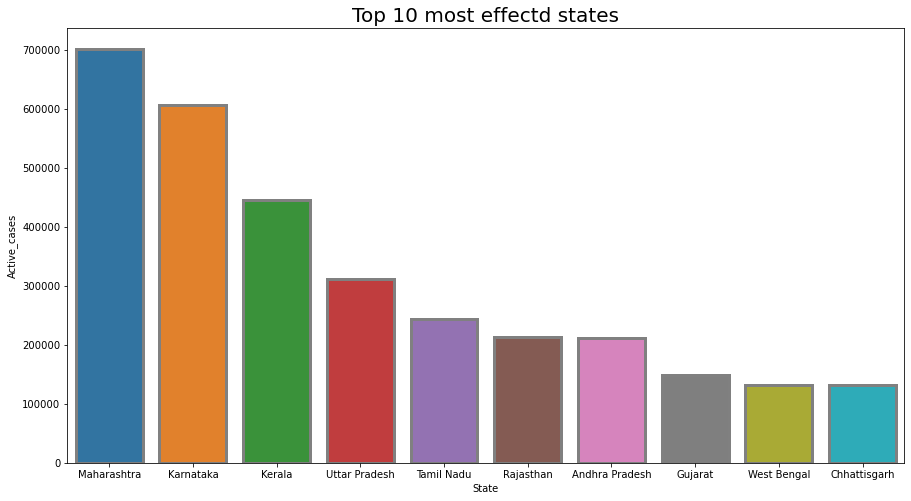

In [54]:
#Plotting a bar graph of total active cases of top 10 most effected states
data1 = df.groupby(by='State').max()[['Active_cases']].sort_values(by='Active_cases',ascending =False).reset_index()
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 most effectd states", size=20)
ax=sns.barplot(data=data1[:10],y='Active_cases',x='State', linewidth=3, edgecolor='grey')

### This shows the rise of covid-19 active case and its peak in top 10 most effected states

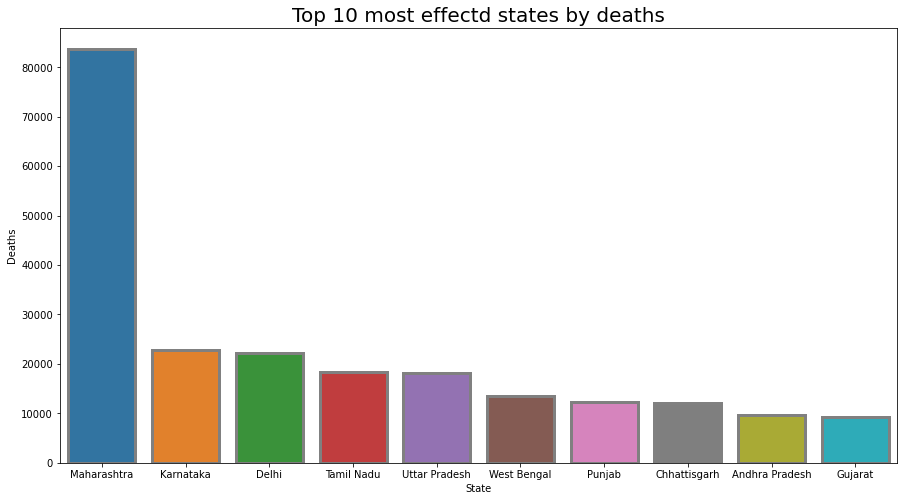

In [55]:
data2 = df.groupby(by='State').max()[['Deaths']].sort_values(by='Deaths',ascending =False).reset_index()
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 most effectd states by deaths", size=20)
ax=sns.barplot(data=data2[:10],y='Deaths',x='State', linewidth=3, edgecolor='grey')

### In the above death chart we could see the significant rise in deaths in maharashtra.
This shows the efficency of state goverment to save people on hand and lack of management skills, however the govt is not to be blamed alone, mindset of people matters significantly

Text(0.5, 1.0, 'Rise in active cases')

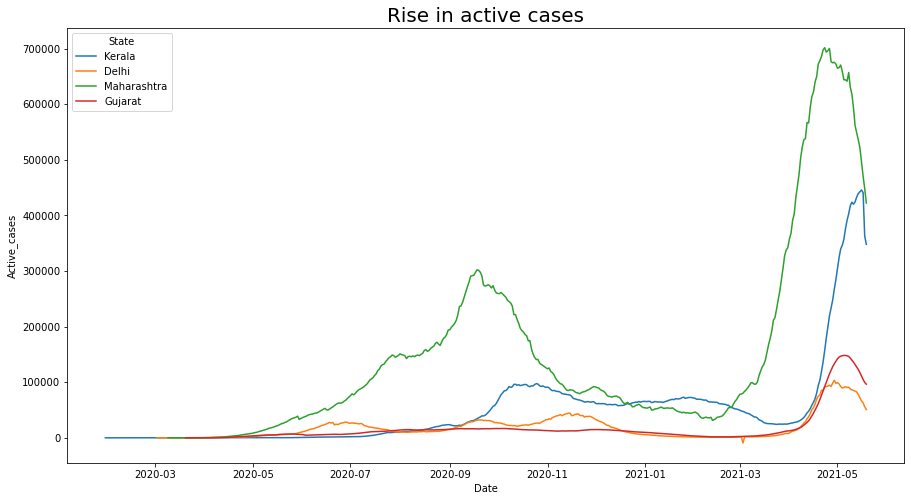

In [56]:
fig = plt.figure(figsize=(15,8))
sns.lineplot(data = df[df['State'].isin(['Kerala','Delhi','Gujarat','Maharashtra'])],x='Date',y='Active_cases',hue='State')
plt.title("Rise in active cases",size=20)

## From the above graph we can clearly see the uniform increase in cases among different parts of the country.
We could see the lockdown had prevented the increase in magnitutde in the first wave but due to economical reasons the lockdown couldnt be implemented in the second wave and hence it had a huge impact.
Other factors such as lack of social distancing also contribute to increase in the spike

Text(0.5, 1.0, 'Death/Confirmed cases')

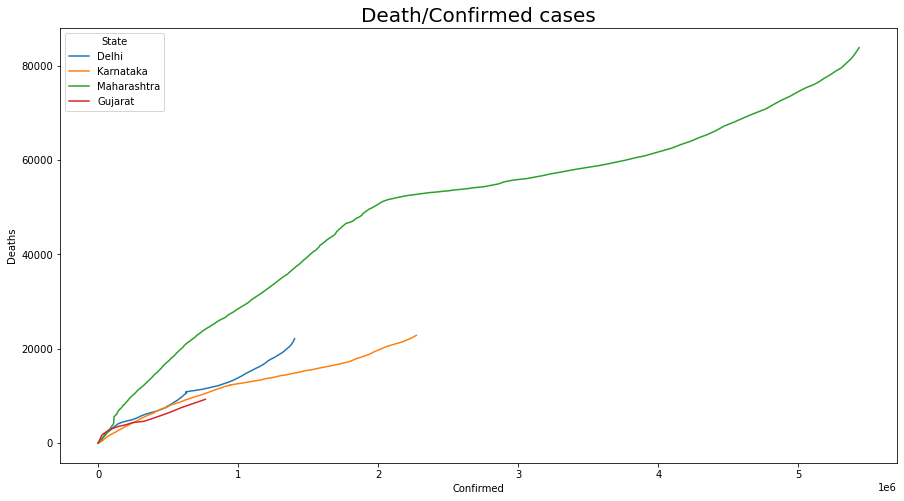

In [57]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df[df['State'].isin(['Maharashtra','Gujarat','Delhi','Karnataka'])],x='Confirmed',y='Deaths',hue='State')
plt.title("Death/Confirmed cases",size=20)

## The state of maharashtra is the worst effected death wise and cases wise

<AxesSubplot:xlabel='Date', ylabel='Deaths'>

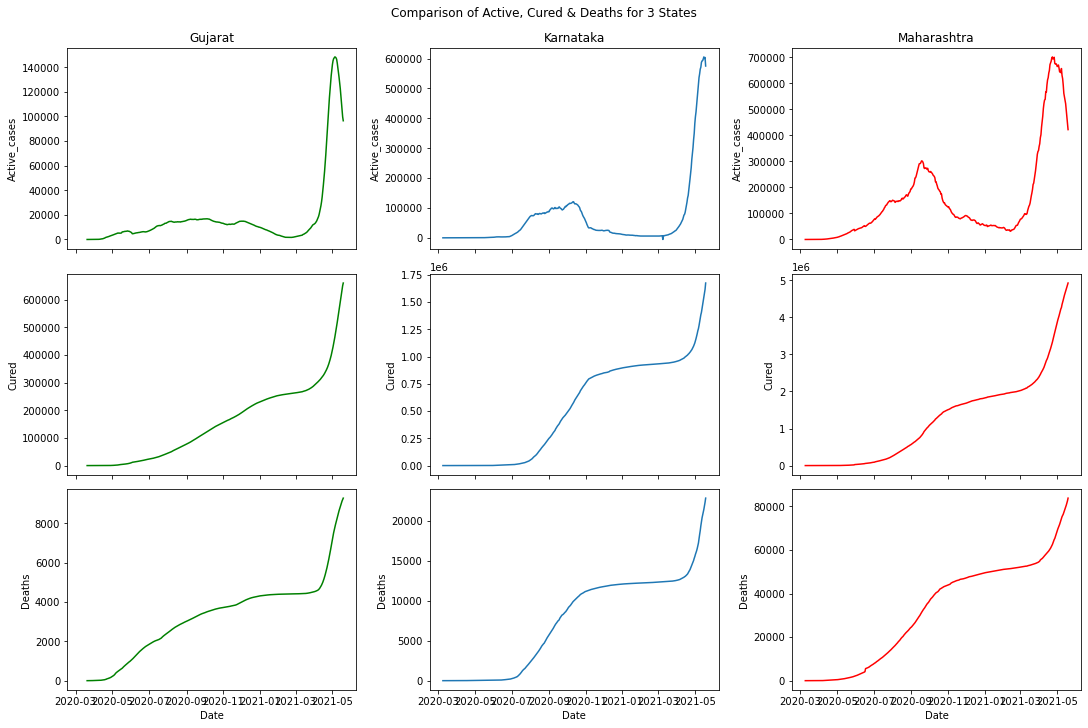

In [58]:
guj=df[df['State']=='Gujarat']
kar=df[df['State']=='Karnataka']
mh=df[df['State']=='Maharashtra']

fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
plt.suptitle("Comparison of Active, Cured & Deaths for 3 States")
sns.lineplot(data=guj, x='Date',y='Active_cases', ax=ax[0,0],color='green')
ax[0,0].set_title("Gujarat")
sns.lineplot(data=guj, x='Date',y='Cured', ax=ax[1,0],color='green')
sns.lineplot(data=guj, x='Date',y='Deaths', ax=ax[2,0],color='green')

sns.lineplot(data=kar, x='Date',y='Active_cases', ax=ax[0,1])
ax[0,1].set_title("Karnataka")
sns.lineplot(data=kar, x='Date',y='Cured', ax=ax[1,1])
sns.lineplot(data=kar, x='Date',y='Deaths', ax=ax[2,1])

sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2],color='red')
ax[0,2].set_title("Maharashtra")
sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2],color='red')
sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2],color='red')

In [59]:
## Finding the mdian of sample 4 states above

df[df['State'].isin(['Gujarat','Karnataka','Maharashtra'])].groupby(by='State').median().reset_index()

,State,Cured,Deaths,Confirmed,Active_cases
0,Gujarat,140898.5,3630.5,159018.5,11126.0
1,Karnataka,592084.0,10036.0,717915.0,15495.0
2,Maharashtra,1281896.0,40514.0,1535315.0,85363.0


Text(0.5, 1.0, 'Box plot for sample states')

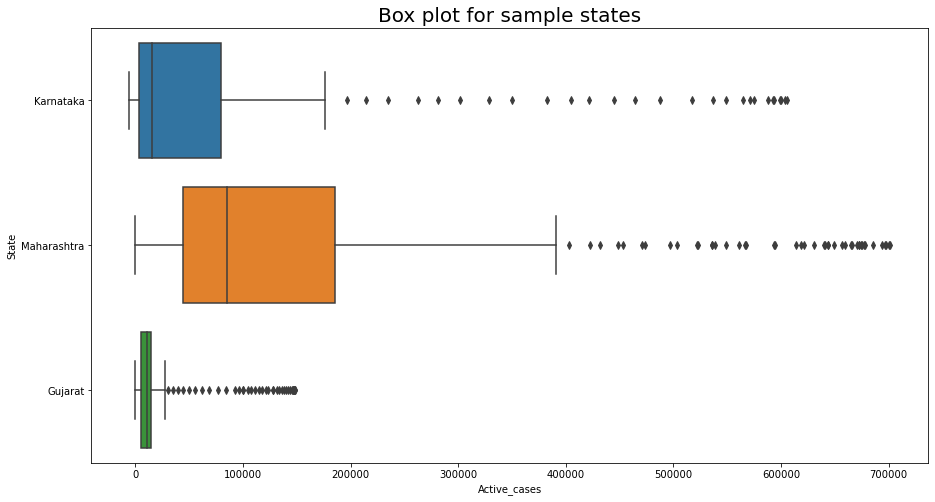

In [60]:
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df[df['State'].isin(['Gujarat','Karnataka','Maharashtra'])],x='Active_cases',y='State')
plt.title("Box plot for sample states" ,size=20)


In [61]:
 df[df['State'].isin(['Gujarat','Karnataka','Maharashtra'])].groupby(by='State').quantile(0.25)

,Date,Cured,Deaths,Confirmed,Active_cases
State,,,,,
Gujarat,2020-07-04 06:00:00,25051.25,1909.25,34778.0,4988.75
Karnataka,2020-06-26 00:00:00,6670.00,170.00,10560.0,3720.00
Maharashtra,2020-06-26 00:00:00,77453.00,6931.00,147741.0,44282.00


In [62]:
 df[df['State'].isin(['Gujarat','Karnataka','Maharashtra'])].groupby(by='State').quantile(0.75)

,Date,Cured,Deaths,Confirmed,Active_cases
State,,,,,
Gujarat,2021-02-01 18:00:00,254007.5,4387.75,261763.5,14693.75
Karnataka,2021-01-30 00:00:00,920110.0,12211.00,938401.0,79798.00
Maharashtra,2021-01-30 00:00:00,1925800.0,51000.00,2021184.0,185467.00


## Some key observation from the above chart
    1. The average number of Active cases in Maharashtra lies between 44282 to 185467 and extends up to <400000 with  median being aroung 85363.
    2. The average number of Active cases in Gujarat lies between 5000 to 15000 and extends up to <50000 with median being aroung 11126.
    3. The average number of Active cases in Karnataka lies between 3720 to 80000 and extends up to <200000 with median being aroung 15495.

## Inorder to prediction analysis we would need cases reported in daily bases
Here i am going to take Gujarat as sample state

In [63]:
## Calculating daily report in covid cases

guj_daily = df[df['State'] == 'Gujarat']
daily = []
daily.append(0)

for i in range(1,len(guj_daily)):
    daily.append(guj_daily['Confirmed'].iloc[i]-guj_daily['Confirmed'].iloc[i-1])

guj_daily['Daily'] = daily

In [64]:
guj_daily

,Date,State,Cured,Deaths,Confirmed,Active_cases,Daily
231,2020-03-20,Gujarat,0.0,0.0,5.0,5.0,0.0
251,2020-03-21,Gujarat,0.0,0.0,7.0,7.0,2.0
274,2020-03-22,Gujarat,0.0,1.0,18.0,17.0,11.0
297,2020-03-23,Gujarat,0.0,1.0,29.0,28.0,11.0
320,2020-03-24,Gujarat,0.0,1.0,33.0,32.0,4.0
...,...,...,...,...,...,...,...
14916,2021-05-15,Gujarat,609031.0,8944.0,735348.0,117373.0,9995.0
14952,2021-05-16,Gujarat,624107.0,9039.0,744409.0,111263.0,9061.0
14988,2021-05-17,Gujarat,638590.0,9121.0,752619.0,104908.0,8210.0
15024,2021-05-18,Gujarat,650932.0,9202.0,759754.0,99620.0,7135.0


In [95]:
from prophet import Prophet


sample=pd.DataFrame(columns=['ds','y'])

sample['ds']=guj_daily['Date']
sample['y']=guj_daily['Daily']
model = Prophet(changepoint_range=1)
model.fit(sample)
future = model.make_future_dataframe(periods=20)
f=model.predict(future)
f['ds']=pd.to_datetime(f['ds'], format='%Y-%m-%d')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


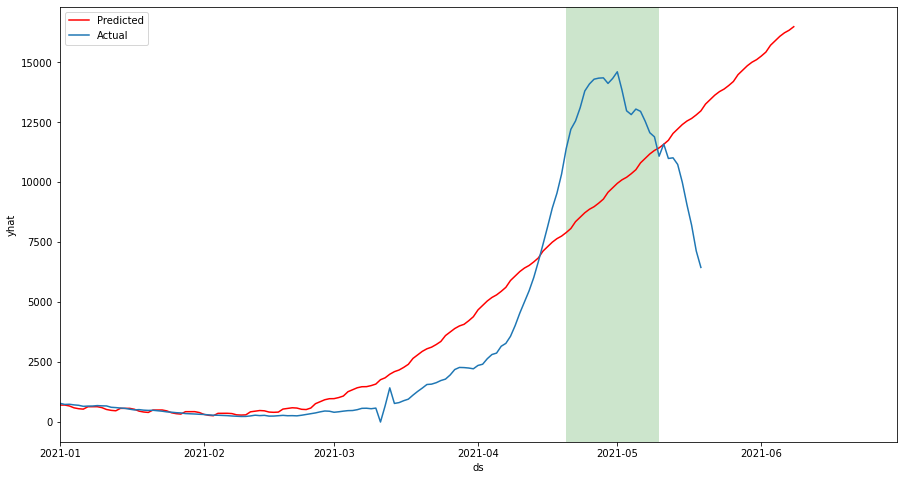

In [116]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=f,x='ds',y='yhat',color='red',alpha=1)
ax = sns.lineplot(data=guj_daily,x='Date',y='Daily')
ax.legend(labels=['Predicted','Actual'], loc='upper left')
ax.set_xlim(mtd.datestr2num('2021-01-01'))
ax.axvspan(xmin='2021-04-20 00:00:00', xmax='2021-05-10 00:00:00', alpha=0.2, facecolor='green')

## Effect of lockdown on 2021-04-20 can be significantly be seen